In [50]:
from pymilvus import Collection, connections
from RAG_Functions import *
import time
from sentence_transformers import SentenceTransformer
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import matplotlib.pyplot as plt

## Load models

In [51]:
# embedding model
embedding_model = SentenceTransformer("mixedbread-ai/mxbai-embed-large-v1")
# chat model
chat_tokenizer = AutoTokenizer.from_pretrained("google/flan-t5-base")
chat_model = AutoModelForSeq2SeqLM.from_pretrained("google/flan-t5-base")

## Connect to Milvus collection 

In [52]:
connections.connect(host='localhost', port='19530')
collection_name = 'text_embeddings'
collection = Collection(name=collection_name)

## Index comparison

### IVF_FLAT

In [53]:
collection.release()
collection.drop_index()
index_params = {
    "metric_type": "L2",
    "index_type": "IVF_FLAT",
    "params": {"nlist": 128},
    "index_name": "embedding_index"
}
collection.create_index(field_name="embedding", index_params=index_params)
collection.load()

In [54]:
# Chat with model
input_text = input()
# Get embedding of input
input_embedding = get_mixedbread_of_query(embedding_model, input_text)

# Start timing query
start_time = time.time()
# Top5 sentences
top5_sentences_IVF_FLAT = return_top_5_sentences(collection, input_embedding)
# End timing query
end_time = time.time()

print(top5_sentences_IVF_FLAT)

(['Marvell: 5.', 'hinge: 15b.', 'BlaBlaCar: (xi) &nbsp.', 'InternetArchive: background: #333.\n}', 'InternetArchive: background: #333.\n}'], ['BlaBlaCar_TermsandConditions.txt', 'InternetArchive_Terms.txt', 'Marvell_TermsofUse.txt', 'hinge_Terms.txt'], [148.83514404296875, 150.18243408203125, 151.6111602783203, 151.72889709472656, 151.72889709472656], 0.46414875984191895)


### FLAT

In [55]:
collection.release()
collection.drop_index()
index_params = {
    "metric_type": "L2",
    "index_type": "FLAT",
    "index_name": "embedding_index"
}
collection.create_index(field_name="embedding", index_params=index_params)
collection.load()

In [56]:
# Chat with model
input_text = input()
# Get embedding of input
input_embedding = get_mixedbread_of_query(embedding_model, input_text)

# Start timing query
start_time = time.time()
# Top5 sentences
top5_sentences_FLAT = return_top_5_sentences(collection, input_embedding)
# End timing query
end_time = time.time()

print(top5_sentences_FLAT)

(['SCJohnson: T  to slu  ba je v  m bezplatn  .', 'SCJohnson: n  uda oma isikuandmete t    tlemise piiramist (  igus t    tlemise piiramisele).', 'SCJohnson: Na vy    d  n   a v souladu s pravidly   t  t   soukrom   v  m k takov  m informac  m poskytneme p    stup.', 'Marvell: 5.', 'SCJohnson: Teatud olukordades on v  imalik, et SC Johnson peab avalikustama isikuandmeid riigiasutuste seadusliku taotluse alusel, sealhulgas riikliku julgeoleku v  i   iguskaitsealaste n  uete t  itmiseks.'], ['SCJohnson_PRIVACYNOTICE.txt', 'Marvell_TermsofUse.txt'], [143.45860290527344, 147.57640075683594, 148.59974670410156, 148.83514404296875, 149.06329345703125], 0.7795720100402832)


### HNSW

In [57]:
collection.release()
collection.drop_index()
index_params = {
    "metric_type": "L2",
    "index_type": "HNSW",
    "params": {"M": 128, "efConstruction": 128},
    "index_name": "embedding_index"
}
collection.create_index(field_name="embedding", index_params=index_params)
collection.load()

In [58]:
# Chat with model
input_text = input()
# Get embedding of input
input_embedding = get_mixedbread_of_query(embedding_model, input_text)

# Start timing query
start_time = time.time()
# Top5 sentences
top5_sentences_HNSW = return_top_5_sentences(collection, input_embedding)
# End timing query
end_time = time.time()

print(top5_sentences_HNSW)

(['Marvell: 5.', 'hinge: 15b.', 'BlaBlaCar: (xi) &nbsp.', 'BlaBlaCar: (vii) &nbsp.', 'BlaBlaCar: (vii) &nbsp.'], ['BlaBlaCar_TermsandConditions.txt', 'Marvell_TermsofUse.txt', 'hinge_Terms.txt'], [148.83514404296875, 150.18243408203125, 151.6111602783203, 152.77243041992188, 152.77243041992188], 0.5055379867553711)


### IVF_SQ8

In [59]:
collection.release()
collection.drop_index()
index_params = {
    "metric_type": "L2",
    "index_type": "IVF_SQ8",
    "params": {"nlist": 128},
    "index_name": "embedding_index"
}
collection.create_index(field_name="embedding", index_params=index_params)
collection.load()

In [60]:
# Chat with model
input_text = input()
# Get embedding of input
input_embedding = get_mixedbread_of_query(embedding_model, input_text)

# Start timing query
start_time = time.time()
# Top5 sentences
top5_sentences_IVF_SQ8 = return_top_5_sentences(collection, input_embedding)
# End timing query
end_time = time.time()

print(top5_sentences_IVF_SQ8)

(['Marvell: 5.', 'hinge: 15b.', 'BlaBlaCar: (xi) &nbsp.', 'InternetArchive: background: #333.\n}', 'InternetArchive: background: #333.\n}'], ['BlaBlaCar_TermsandConditions.txt', 'InternetArchive_Terms.txt', 'Marvell_TermsofUse.txt', 'hinge_Terms.txt'], [148.94642639160156, 150.19046020507812, 151.5994873046875, 151.87091064453125, 151.87091064453125], 0.5237791538238525)


### SCANN

In [61]:
collection.release()
collection.drop_index()
index_params = {
    "metric_type": "L2",
    "index_type": "SCANN",
    "params": {"nlist": 128},
    "index_name": "embedding_index"
}
collection.create_index(field_name="embedding", index_params=index_params)
collection.load()

In [62]:
# Chat with model
input_text = input()
# Get embedding of input
input_embedding = get_mixedbread_of_query(embedding_model, input_text)

# Start timing query
start_time = time.time()
# Top5 sentences
top5_sentences_SCANN = return_top_5_sentences(collection, input_embedding)
# End timing query
end_time = time.time()

print(top5_sentences_SCANN)

(['Marvell: 5.', 'hinge: 15b.', 'BlaBlaCar: (vii) &nbsp.', 'BlaBlaCar: (vii) &nbsp.', 'BlaBlaCar: (vii) &nbsp.'], ['BlaBlaCar_TermsandConditions.txt', 'Marvell_TermsofUse.txt', 'hinge_Terms.txt'], [148.83514404296875, 150.18243408203125, 152.77243041992188, 152.77243041992188, 152.77243041992188], 0.43584370613098145)


## Visualization

In [63]:
indexes = ['IVF_FLAT', 'FLAT', 'HNSW', 'IVF_SQ8', 'SCANN']
results = [top5_sentences_IVF_FLAT, top5_sentences_FLAT, top5_sentences_HNSW, top5_sentences_IVF_SQ8, top5_sentences_SCANN]
query_time = {}
distance = {}
for i, result in enumerate(results):
    query_time[indexes[i]] = result[3]
    distance[indexes[i]] = result[2][0]
query_time

{'IVF_FLAT': 0.46414875984191895,
 'FLAT': 0.7795720100402832,
 'HNSW': 0.5055379867553711,
 'IVF_SQ8': 0.5237791538238525,
 'SCANN': 0.43584370613098145}

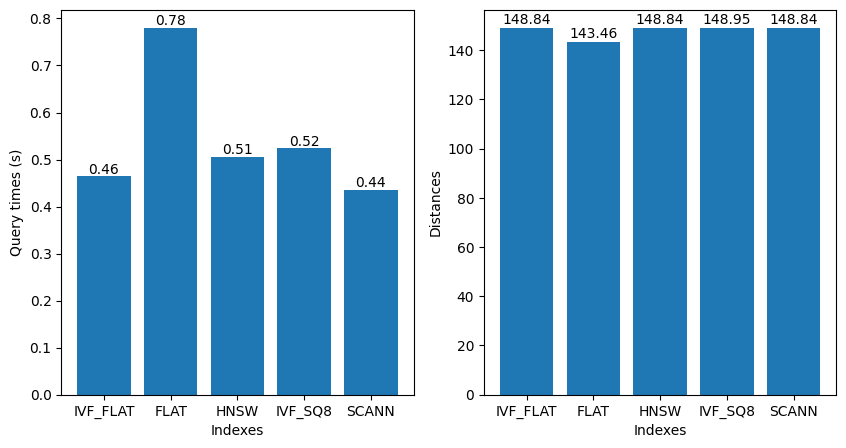

In [64]:
indexes = list(query_time.keys())
times = list(query_time.values())
distances = list(distance.values())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
bars1 = ax1.bar(indexes, times)
ax1.set_xlabel('Indexes')
ax1.set_ylabel('Query times (s)')
for bar, value in zip(bars1, times):
    ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(value,2), ha='center', va='bottom')

bars2 = ax2.bar(indexes, distances)
ax2.set_xlabel('Indexes')
ax2.set_ylabel('Distances')
for bar, value in zip(bars2, distances):
    ax2.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, round(value,2), ha='center', va='bottom')